In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
car = pd.read_csv("C:/Users/진현킴/Downloads/car.data")

In [4]:
car

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in car.columns :
    car[i] = le.fit_transform(car[i])

In [7]:
car.dropna()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [11]:
y = car['unacc']

In [12]:
X = car.iloc[:,0:6].values

In [13]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
print(y_train.shape)
print(y_test.shape)

(1381, 4)
(346, 4)


In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(20,input_shape=(6,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 20)                140       
                                                                 
 dense_29 (Dense)            (None, 10)                210       
                                                                 
 dense_30 (Dense)            (None, 8)                 88        
                                                                 
 dense_31 (Dense)            (None, 4)                 36        
                                                                 
Total params: 474
Trainable params: 474
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
44/44 [==============================] - 2s 14ms/step - loss: 1.2762 - accuracy: 0.5047 - val_loss: 1.1372 - val_accuracy: 0.6850
Epoch 2/100
44/44 [==============================] - 0s 5ms/step - loss: 0.9796 - accuracy: 0.6988 - val_loss: 0.8710 - val_accuracy: 0.6908
Epoch 3/100
44/44 [==============================] - 0s 6ms/step - loss: 0.7856 - accuracy: 0.7024 - val_loss: 0.7831 - val_accuracy: 0.6936
Epoch 4/100
44/44 [==============================] - 0s 5ms/step - loss: 0.7278 - accuracy: 0.7060 - val_loss: 0.7518 - val_accuracy: 0.6965
Epoch 5/100
44/44 [==============================] - 0s 5ms/step - loss: 0.7000 - accuracy: 0.7118 - val_loss: 0.7306 - val_accuracy: 0.7139
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6796 - accuracy: 0.7161 - val_loss: 0.7159 - val_accuracy: 0.7197
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.7277 - val_loss: 0.7038 - val_accuracy: 0.7081
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1103 - accuracy: 0.9667 - val_loss: 0.1271 - val_accuracy: 0.9509
Epoch 60/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9674 - val_loss: 0.1272 - val_accuracy: 0.9538
Epoch 61/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9681 - val_loss: 0.1231 - val_accuracy: 0.9538
Epoch 62/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1032 - accuracy: 0.9681 - val_loss: 0.1231 - val_accuracy: 0.9538
Epoch 63/100
44/44 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9667 - val_loss: 0.1212 - val_accuracy: 0.9538
Epoch 64/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9667 - val_loss: 0.1197 - val_accuracy: 0.9538
Epoch 65/100
44/44 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9674 - val_loss: 0.1168 - val_accuracy: 0.9566
Epoch 

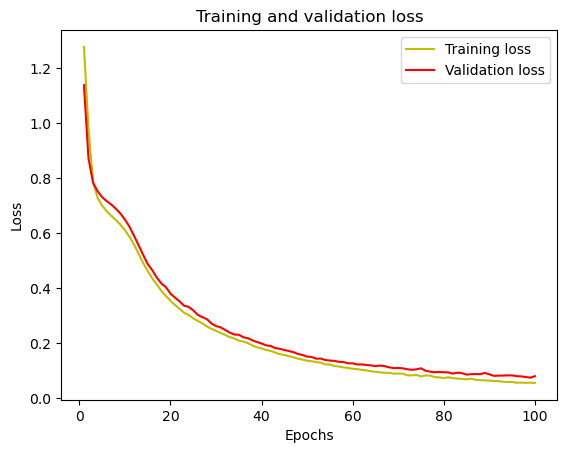

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

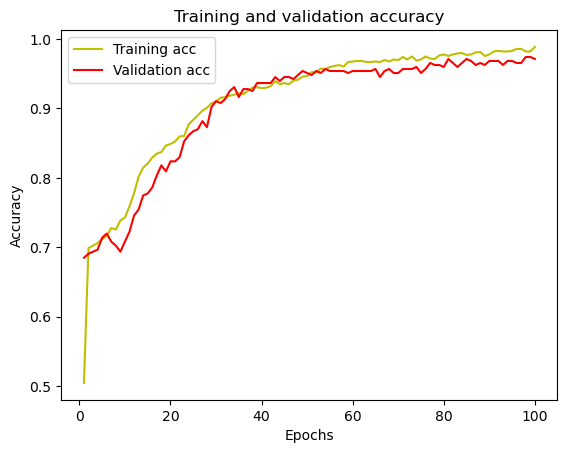

In [40]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75        77
           1       0.00      0.00      0.00        14
           2       0.97      0.97      0.97       239
           3       0.00      0.00      0.00        16

    accuracy                           0.87       346
   macro avg       0.40      0.47      0.43       346
weighted avg       0.81      0.87      0.84       346

[[ 69   0   8   0]
 [ 14   0   0   0]
 [  7   0 232   0]
 [ 16   0   0   0]]


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'unacc')

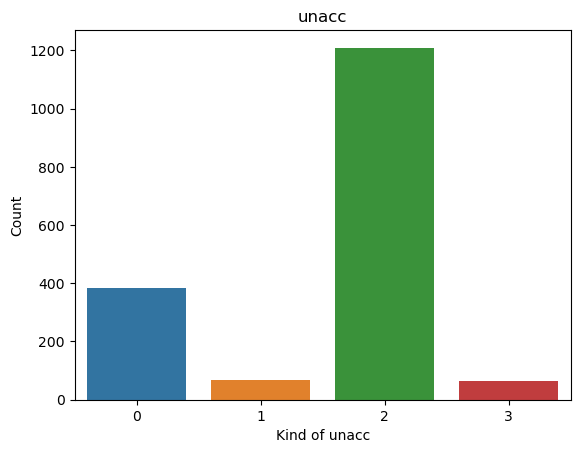

In [32]:
import seaborn as sns
sns.countplot(data = car, x="unacc")
plt.xlabel("Kind of unacc")
plt.ylabel("Count")
plt.title("unacc")